# next time consider using manim package from 3Blue1Brown

In [1]:
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=r'C:\WINDOWS\Fonts\TH-Tshyn-P0.ttf', size=35) # TH-Tshyn-P0.ttf works with CJK characters. http://cheonhyeong.com/English/download.html

In [2]:
import scipy
import matplotlib as mpl
from matplotlib import pyplot as plt
import random
import warnings
import arrow
import numpy as np
warnings.filterwarnings('ignore')
import matplotlib.animation as animation # # https://matplotlib.org/3.1.1/gallery/animation/dynamic_image.html

In [3]:
params = {'axes.labelsize': 8,'axes.titlesize':8}
mpl.rcParams.update(params)

In [114]:
def heart(ax,pos_x,pos_y,diam,text=None,centered=False,straightness=0):
    """if centered=True, cen_x and cen_y refer to the center of the heart.
       if centered_False, cen_x and cen_y refer to the upper left corner of the invisible square containing the heart
       ::straightness:: value between 0 and 1. 1 makes the sides perfectly straight.
    """
    if centered:
        cen_x, cen_y = pos_x, pos_y
    else:
        cen_x = pos_x + diam/2
        cen_y = pos_y - diam/2
    res = []
    #fig, ax = plt.subplots()
    min_x = -.5*diam+cen_x
    max_x = .5*diam+cen_x
    x = scipy.linspace(min_x,max_x,300)
    top_y = diam*0.25*scipy.sqrt(1-(abs(((x-cen_x)*4/diam))-1)**2)+cen_y # top half of heart
    bottom_y = diam*-.75*scipy.sqrt(1-(abs((x-cen_x)*2/diam))**0.5)+cen_y # bottom half
    if straightness > 0:
        slope = .72799/0.5
        bottom_y_straight = [-slope*(x_i-cen_x)-.72799*diam+cen_y if x_i<cen_x else slope*(x_i-cen_x)-.72799*diam+cen_y  for x_i in x]
        bottom_y = [straightness * a + (1-straightness)*b for a,b in zip(bottom_y_straight,bottom_y)]
    vertex_y = np.real(diam*-.75*scipy.sqrt(1-(abs(max_x*2/diam-cen_x))**0.5)+cen_y) #y coord of where the top half meets the bottom half
    mid_y = min(bottom_y)+(max(top_y) - min(bottom_y))/2
    top_y += (vertex_y - mid_y)
    bottom_y += (vertex_y - mid_y)
    color = random.choice(['red','#ff9ed7','#ff9ea7','#ff9e9e','#fed4d6','#ffc69e']) #https://www.beautycolorcode.com/ffc69e
    res.append(ax.fill_between(x, top_y, cen_y+vertex_y-mid_y,color=color))
    res.append(ax.fill_between(x, bottom_y, cen_y+vertex_y-mid_y,color=color))
    if text:
        res.append(ax.text(cen_x, cen_y, text, fontweight='bold',
               color='blue', horizontalalignment='center',fontproperties=fp))
    return res

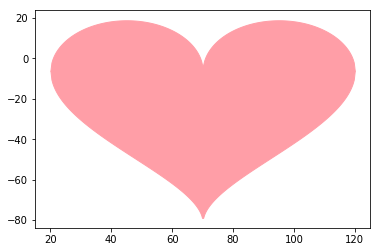

In [137]:
fig, ax = plt.subplots()
heart(ax,20,20,100,centered=False)

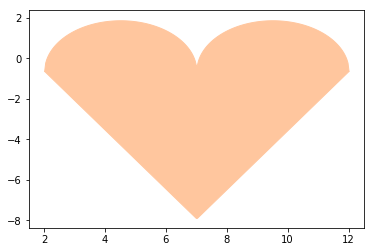

In [138]:
fig, ax = plt.subplots()
heart(ax,2,2,10,centered=False, straightness=1)

In [115]:
a = [[1,2],[3,4]]
flatten = lambda l: [item for sublist in l for item in sublist]
print(flatten(a))

[1, 2, 3, 4]


In [116]:
# draw korean characters with ones . each 1 will be rendered as a heart.
rabu_coord ="""
111	10		1	0	0	0	1
001	10		1	1	1	1	1
001	10		1	0	0	0	1
111	11		1	1	1	1	1
100	10					
100	10		1	1	1	1	1
111	10		0	0	1	0	0"""

In [117]:
rabu_coord_lines = rabu_coord.split('\n')[1:]

In [118]:
coords = []
for y,row in enumerate(rabu_coord_lines):
    for x,value in enumerate(row):
        if value=='1':
            coords.append((x,y))

In [119]:
max_x = max([x for x,y in coords])
max_y = max([y for x,y in coords])

In [120]:
# flip y coordinates
coords = [(x,max_y-y) for x,y in coords]

In [121]:
#convert to actual coordinates assuming width and height of canvas is 800
rabu_coords = [(int(x*720/max_x+1),int(y*720/max_y+1)) for x,y in coords]
rabu_coords.append(rabu_coords[-1]) # repeat the last frame for a bit
rabu_coords.append(rabu_coords[-1])
rabu_coords.append(rabu_coords[-1])

In [133]:
%%capture
fig, ax = plt.subplots()
plt.rcParams['animation.ffmpeg_path'] = r'C:\ffmpeg\ffmpeg.exe'
ax.set_xlim([0, 800])
ax.set_yticklabels([])
ax.set_xticklabels([])
ims = []
for diam in range(100,801,100):
    ims.append(heart(ax,400,400,diam,text="Yoyo와이피",centered=True))
segasapi = []
segasapi.append(heart(ax,1,799,398,text="세 "))
segasapi.append(heart(ax,401,799,398,text="가 "))
segasapi.append(heart(ax,1,401,398,text="사 "))
segasapi.append(heart(ax,401,401,398,text="피 "))
segasapi.append(heart(ax,401,401,398,text="피 "))
segasapi.append(heart(ax,401,401,398,text="피 "))
for i,p in enumerate(segasapi):
    ims.append(flatten(segasapi[:i+1])) # add all the plot elements up until this index
rabu = []
for (x,y) in rabu_coords:
    rabu.append(heart(ax,x,y,65))
for i,p in enumerate(rabu):
    ims.append(flatten(rabu[:i+1])) # add all the plot elements up until this index
for diam in list(range(100,501,50)) + list(range(501,100,-50)) + list(range(100,801,50)):
    ims.append(heart(ax,400,400,diam,text="생일축하!",centered=True))
for diam in range(100,801,100):
    ims.append(heart(ax,400,400,diam,text="激らぶ!",centered=True))
for straightness in list(np.arange(0,1.01,.1)) + list(np.arange(1,0,-.1)):
    ims.append(heart(ax,400,400,800,text="激らぶ!",centered=True,straightness=straightness))
for diam in range(100,801,25):
    ims.append(heart(ax,400,400,diam,text="from허비",centered=True))
ani = animation.ArtistAnimation(fig, ims, interval=2000, blit=False,repeat=False)

In [134]:
from matplotlib.animation import FFMpegWriter
writer = FFMpegWriter(fps=4, metadata=dict(artist='Me'), bitrate=1200)
ani.save(r"C:\Users\jerrychi\Downloads\heart{}.mp4".format(arrow.utcnow().format('YYYY-MM-DD-hh-mm-ss')),writer=writer)